In [1]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
import tensorflow.keras.backend as be

In [2]:
from utils import *
from data import *
from layers import *
from models import *

In [3]:
from models import *

In [4]:
limit_gpus()
set_gpu(1)

In [5]:
dpi=100

In [6]:
dataset = "fashion_mnist"
ds_train, ds_test, ds_info = load_dataset(dataset, 128)

input_shape = ds_info.features['image'].shape
num_classes = ds_info.features['label'].num_classes

In [7]:
x_train, y_train = get_raw_dat(ds_train)

In [8]:
x_test, y_test = get_raw_dat(ds_test)

In [9]:
xs, ys = next(iter(ds_train))

In [10]:
input_shape

(28, 28, 1)

In [11]:
model = PhasorModel(input_shape, 
                    onehot_offset=0.0, 
                    onehot_phase=0.5,
                    projection="dot",
                   
                   exec_time=5.0,
                   repeats=5,
                   max_step=0.02)

In [12]:
ys0 = model(xs)

(array([149., 101.,  82., 114., 153., 153., 144., 129., 119., 136.]),
 array([-0.99473155, -0.7953694 , -0.5960072 , -0.39664504, -0.19728287,
         0.00207931,  0.20144148,  0.40080366,  0.60016584,  0.799528  ,
         0.99889016], dtype=float32),
 <BarContainer object of 10 artists>)

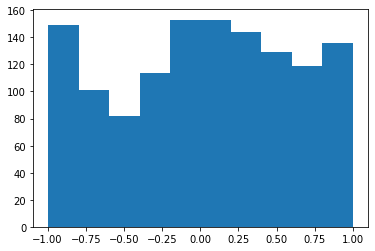

In [13]:
plt.hist(ys0.numpy().ravel())

In [14]:
model.compile(optimizer="rmsprop")

In [15]:
loss = model.train(ds_train, 1)

Training loss tf.Tensor(0.9508656, shape=(), dtype=float32)
Training loss tf.Tensor(0.038243975, shape=(), dtype=float32)
Training loss tf.Tensor(0.033796865, shape=(), dtype=float32)
Training loss tf.Tensor(0.030824374, shape=(), dtype=float32)
Training loss tf.Tensor(0.031784624, shape=(), dtype=float32)


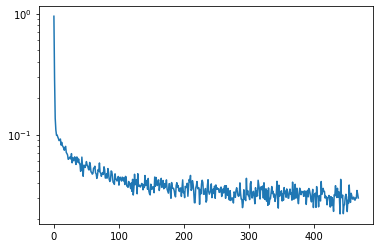

In [16]:
plt.semilogy(loss)

In [17]:
yh1 = model(xs)

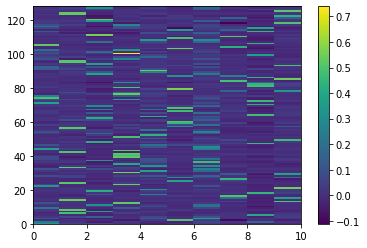

In [18]:
plt.pcolor(yh1)
plt.colorbar()

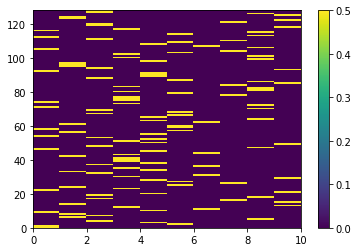

In [19]:
plt.pcolor(model.to_phase(ys))
plt.colorbar()

In [20]:
conf = model.accuracy(ds_test)

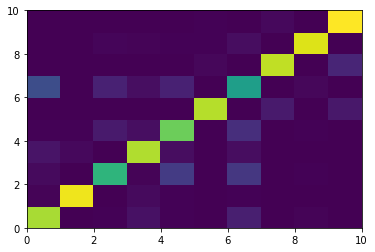

In [21]:
plt.pcolor(conf[0])

In [22]:
confusion_to_accuracy(conf)

<tf.Tensor: shape=(), dtype=float64, numpy=0.8227>

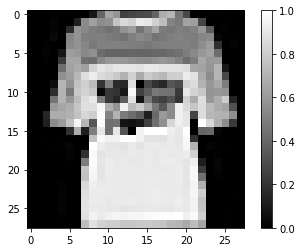

In [23]:
plt.imshow(xs[0,...], cmap="gray")
plt.colorbar()

In [24]:
preprocess = keras.Sequential([model.layers[0]])

In [25]:
input_spikes = model.phase_to_train(tf.multiply(preprocess(xs[0:10,...]), model.direction))

In [26]:
model.call_dynamic(xs[0:2,...])

100%|██████████| 2/2 [00:04<00:00,  2.06s/it]


array([[[ 0.34020737,  0.06020737,  0.10020737,  0.02020737,
         -0.01979263,  0.02020737,  0.10020737,  0.02020737,
          0.02020737,  0.02020737],
        [ 0.34020737,  0.06020737,  0.10020737,  0.02020737,
         -0.01979263,  0.02020737,  0.10020737,  0.02020737,
          0.02020737,  0.02020737],
        [ 0.34020737,  0.06020737,  0.10020737,  0.02020737,
         -0.01979263,  0.02020737,  0.10020737,  0.02020737,
          0.02020737,  0.02020737],
        [ 0.34020737,  0.06020737,  0.10020737,  0.02020737,
         -0.01979263,  0.02020737,  0.10020737,  0.02020737,
          0.02020737,  0.02020737],
        [ 0.34020737,  0.06020737,  0.10020737,  0.02020737,
         -0.01979263,  0.02020737,  0.10020737,  0.02020737,
          0.02020737,  0.02020737]],

       [[ 0.30614306,  0.06614306, -0.01385694,  0.06614306,
          0.02614306,  0.        ,  0.10614306,  0.06614306,
          0.18614306,  0.06614306],
        [ 0.30614306,  0.06614306, -0.01385694,  0

Text(0.5, 1.0, 'Input Layer')

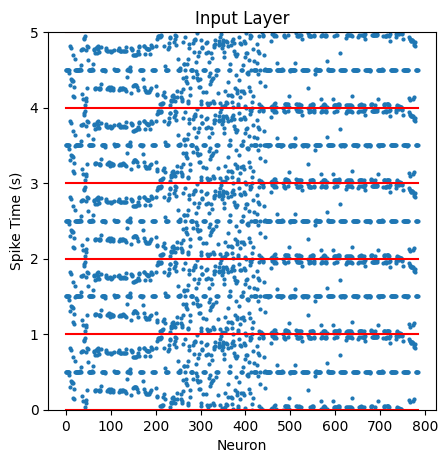

In [27]:
plt.figure(dpi=dpi, figsize=(5,5))
for i in range(10):
    plt.plot([0,784],[0.0+i,0+i], color="red")
plt.scatter(input_spikes[0][0], input_spikes[0][1], label="Input Spikes (Drive)", s=4)
#plt.scatter(dynamic_spikes[0][0], dynamic_spikes[0][1], label="Output Spikes (Response)")
#plt.xticks(lblinds, np.around(phases.ravel()[lblinds], decimals=2));

plt.xlabel("Neuron")
plt.ylabel("Spike Time (s)")
plt.ylim(0,5)
#plt.ylim(-0.5,10)
plt.title("Input Layer")

In [28]:
spk_layer1 = model.dense1.spike_trains

Text(0.5, 1.0, 'Dense 1')

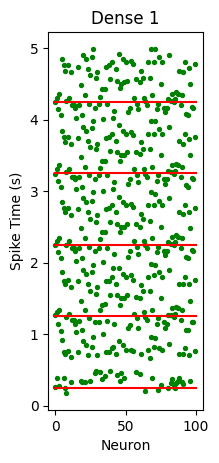

In [29]:
plt.figure(dpi=dpi, figsize=(2,5))
#plt.scatter(dynamic_input[0][0], dynamic_input[0][1], label="Input Spikes (Drive)")
for i in range(5):
    plt.plot([0,100],[0.25+i,0.25+i], color="red")
plt.scatter(spk_layer1[0][0], spk_layer1[0][1], label="Output Spikes (Response)", color="green", s=8)
#plt.xticks(lblinds, np.around(phases.ravel()[lblinds], decimals=2));
plt.xlabel("Neuron")
plt.ylabel("Spike Time (s)")
#plt.ylim(-0.5,10)
plt.title("Dense 1")

In [30]:
spk_layer2 = model.dense2.spike_trains

Text(0.5, 1.0, 'Dense 2')

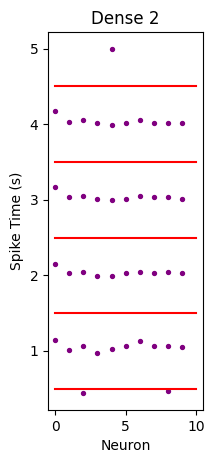

In [31]:
plt.figure(dpi=dpi, figsize=(2,5))
#plt.scatter(dynamic_input[0][0], dynamic_input[0][1], label="Input Spikes (Drive)")
for i in range(5):
    plt.plot([0,10],[0.50+i,0.50+i], color="red")
plt.scatter(spk_layer2[0][0], spk_layer2[0][1], label="Output Spikes (Response)", color="purple", s=8)
#plt.xticks(lblinds, np.around(phases.ravel()[lblinds], decimals=2));
plt.xlabel("Neuron")
plt.ylabel("Spike Time (s)")
#plt.ylim(-0.5,10)
plt.title("Dense 2")

In [32]:
#execution sensitivity test

In [33]:
points = np.logspace(2.5, 0.7, 21).astype("int")

In [34]:
points

array([316, 257, 208, 169, 138, 112,  91,  74,  60,  48,  39,  32,  26,
        21,  17,  14,  11,   9,   7,   6,   5])

In [35]:
dts = 1.0 / points

In [36]:
dts

array([0.00316456, 0.00389105, 0.00480769, 0.00591716, 0.00724638,
       0.00892857, 0.01098901, 0.01351351, 0.01666667, 0.02083333,
       0.02564103, 0.03125   , 0.03846154, 0.04761905, 0.05882353,
       0.07142857, 0.09090909, 0.11111111, 0.14285714, 0.16666667,
       0.2       ])

In [37]:
x_subset = x_test[0:128,...]
y_subset = y_test[0:128,...]

In [38]:
model.dyn_params

{'leakage': -0.2,
 'period': 1.0,
 'window': 0.05,
 'spk_mode': 'gradient',
 'threshold': 0.03,
 'exec_time': 5.0,
 'max_step': 0.02}

In [39]:
out = model.call_dynamic(x_subset, solver="heun")

100%|██████████| 128/128 [01:11<00:00,  1.80it/s]


In [40]:
ys0 = model.predict(out, method="dynamic_last")

In [41]:
np.mean(ys0 == y_subset)

0.8515625

In [42]:
def test_sensitivity(dts):
    results = []
    
    for dt in dts:
        model.dense1.max_step = dt
        model.dense2.max_step = dt
        
        out = [model.call_dynamic(x_subset, solver="heun")]
        results.append(out)
        
    return results

In [43]:
dts

array([0.00316456, 0.00389105, 0.00480769, 0.00591716, 0.00724638,
       0.00892857, 0.01098901, 0.01351351, 0.01666667, 0.02083333,
       0.02564103, 0.03125   , 0.03846154, 0.04761905, 0.05882353,
       0.07142857, 0.09090909, 0.11111111, 0.14285714, 0.16666667,
       0.2       ])

In [53]:
np.logspace(np.log10(0.02), np.log10(0.2), 10)

array([0.02      , 0.02583099, 0.03336201, 0.04308869, 0.05565119,
       0.07187627, 0.09283178, 0.11989685, 0.15485274, 0.2       ])

In [44]:
res = test_sensitivity(dts)

100%|██████████| 128/128 [00:08<00:00, 14.76it/s]


In [45]:
len(res[0])

1

In [61]:
res[0][0].shape

(128, 5, 10)

In [47]:
res2 = [np.mean(model._last_prediction(o[0]) == y_subset) for o in res]

In [55]:
model.layers

In [56]:
hasattr(model.dense1, "spike_trains")

True

In [64]:
def get_input_train_mlp(model, images):
    x = model.flatten(images)
    if model.projection == "NP":
        x = model.image_encoder(x, training=True)
    elif model.projection == "dot":
        x = tf.multiply(model.direction, x)
    #convert continuous time representations into periodic spike train
    s = model.phase_to_train(x)
    
    return s

In [65]:
input_s = get_input_train(model, x_subset)

In [70]:
count_lambda = lambda x, t: np.sum(x[1] < t)

In [72]:
count_lambda(input_s[0], 1.5)

1046

In [75]:
np.sum(list(map(lambda x: count_lambda(x, 1.5), input_s)))

126196

In [365]:
model.summary()

Model: "phasor_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (10, 784)                 0         
_________________________________________________________________
dropout1 (Dropout)           multiple                  0         
_________________________________________________________________
cmpx_linear (CmpxLinear)     multiple                  78400     
_________________________________________________________________
dropout2 (Dropout)           multiple                  0         
_________________________________________________________________
cmpx_linear_1 (CmpxLinear)   multiple                  1000      
Total params: 79,400
Trainable params: 79,400
Non-trainable params: 0
_________________________________________________________________


In [95]:
def count_spks_mlp(model, input_spks, t):
    n_batch = len(input_spks)
    
    count_lambda = lambda x: np.sum(x[1] < t)
    #get the average, cumulative number of input spikes at the current time
    input_sum = np.mean(list(map(count_lambda, input_spks)))
    #get the average, cumulative number of dense1 spikes at the current time
    dense_spks = model.dense1.spike_trains
    mid_sum = np.mean(list(map(count_lambda, dense_spks)))
    
    return [input_sum, mid_sum]  
                

In [99]:
def count_updates_mlp(model, t, dt=-1):
    if dt < 0:
        dt = model.dyn_params["max_step"]
        
    #count the neuronal updates
    steps = np.floor(t / dt)
    mid_updates = steps * model.n_hidden
    last_updates = steps * model.n_classes
    
    return [mid_updates, last_updates]

In [123]:
def count_ops_mlp(model, input_spks, t, dt=-1):
    fanout = np.array([[model.n_hidden, model.n_classes]])
    spk_ops = count_spks_mlp(model, input_spks, t) * fanout
    
    update_ops = count_updates_mlp(model, t, dt)
    
    ops = np.concatenate((spk_ops.ravel(), update_ops), axis=0)
    return ops

In [112]:
trange = np.linspace(0, 5.0, 501)

In [108]:
spikes = np.array([count_spks_mlp(model, input_s, t) for t in trange])

In [117]:
count_updates_mlp(model, 0.5, 0.02)

[2500.0, 250.0]

In [127]:
ooo = count_ops_mlp(model, input_s, 1.0, 0.02)

In [129]:
ops = np.array([count_ops_mlp(model, input_s, t) for t in trange])

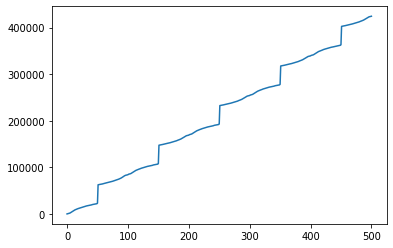

In [130]:
plt.plot(ops.sum(axis=1))

In [144]:
cycles = np.arange(5)

In [155]:
tsteps = cycles * 1.0 + 0.5

In [156]:
tsteps

array([0.5, 1.5, 2.5, 3.5, 4.5])

In [132]:
def predict_ind(phases, ind=-2):
    distance = tf.math.abs(phases - 0.5)
    indices = tf.math.argmin(distance, axis=2)
    selected = indices[:,ind]

    return selected

In [137]:
res[-1][0].shape

(128, 5, 10)

In [148]:
len(res)

21

In [152]:
accs = np.array([[np.mean(predict_ind(o[0], j) == y_subset) for j in cycles] for o in res])

In [168]:
ops2 = np.array([[count_ops_mlp(model, input_s, t, dt=dt).sum(axis=0) for t in tsteps] for dt in dts]) 

In [176]:
ops2.shape

(21, 5)

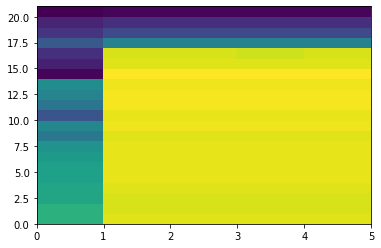

In [177]:
plt.pcolor(accs)

Text(0, 0.5, 'Accuracy')

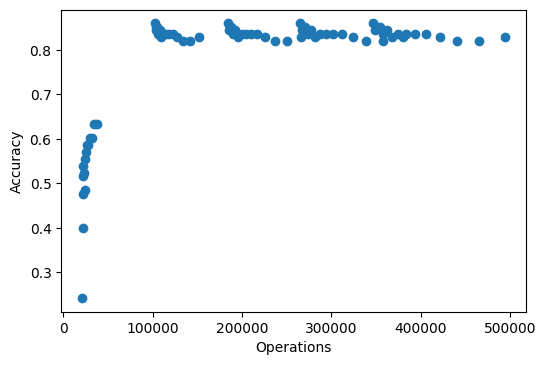

In [180]:
plt.figure(dpi=dpi)
plt.scatter(ops2[0:15,:], accs[0:15,:])
plt.xlabel("Operations")
plt.ylabel("Accuracy")

In [174]:
ops2.shape

(21, 5)

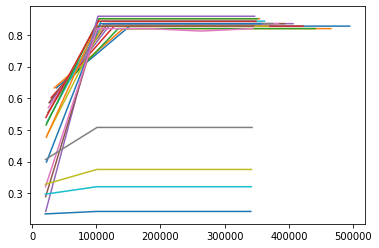

In [175]:
plt.plot(ops2.transpose(), accs.transpose())

In [374]:
info = np.load("runs/resolution/info.npz")

In [376]:
restest_ys = info['true_ys']

In [378]:
restest_points = info['resolution_points']

In [385]:
all_data = [np.load("runs/resolution/cifar_dyn_batch" + str(i) +".npz")['a'] for i in range(8)]

In [401]:
res_preds = list(map(lambda x: np.mean(predict_ind(x) == restest_ys), all_data))

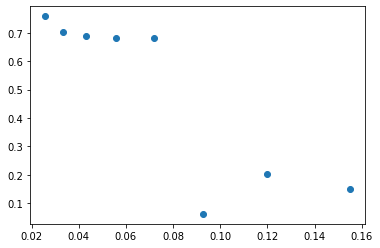

In [402]:
plt.scatter(restest_points[0:8], res_preds)

In [387]:
predict_ind(all_data[0])

<tf.Tensor: shape=(128,), dtype=int64, numpy=
array([9, 5, 4, 8, 4, 6, 7, 0, 6, 2, 9, 1, 5, 0, 5, 8, 1, 7, 6, 6, 0, 0,
       7, 4, 6, 7, 8, 8, 9, 9, 7, 5, 4, 0, 0, 9, 1, 0, 1, 5, 0, 7, 5, 0,
       1, 6, 2, 3, 8, 3, 7, 4, 4, 1, 3, 2, 2, 1, 6, 2, 7, 0, 4, 1, 8, 0,
       2, 5, 3, 0, 6, 1, 5, 5, 8, 2, 5, 7, 0, 8, 0, 1, 6, 8, 8, 9, 8, 1,
       5, 5, 2, 6, 6, 8, 5, 3, 1, 8, 1, 6, 0, 8, 7, 3, 4, 1, 7, 3, 5, 2,
       1, 7, 4, 4, 9, 5, 4, 4, 2, 8, 1, 4, 8, 5, 2, 4, 0, 8])>

In [381]:
restest_ys

array([9, 7, 4, 8, 8, 2, 7, 0, 6, 2, 9, 1, 5, 0, 3, 8, 1, 7, 2, 2, 0, 0,
       7, 2, 6, 7, 0, 8, 9, 3, 7, 5, 2, 0, 0, 9, 1, 0, 5, 5, 0, 3, 5, 0,
       1, 0, 2, 3, 8, 5, 7, 4, 4, 1, 5, 2, 2, 1, 5, 2, 7, 0, 2, 1, 8, 5,
       3, 5, 3, 0, 6, 1, 5, 2, 8, 2, 5, 3, 0, 8, 8, 1, 6, 8, 8, 9, 8, 1,
       5, 7, 3, 6, 0, 8, 5, 3, 1, 8, 1, 4, 0, 8, 7, 3, 4, 1, 4, 3, 2, 2,
       1, 7, 4, 4, 9, 3, 4, 4, 2, 8, 1, 2, 8, 5, 2, 4, 0, 5])

In [383]:
predict_ind(data)

<tf.Tensor: shape=(128,), dtype=int64, numpy=
array([0, 5, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 5, 1,
       1, 0, 6, 1, 0, 0, 1, 0, 0, 1, 0, 0, 4, 1, 0, 0, 0, 0, 1, 0, 1, 3,
       1, 0, 1, 0, 0, 5, 0, 0, 4, 0, 2, 1, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 7, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 6, 0, 0, 0, 0, 5, 4, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 3, 1, 0, 0, 0])>

In [370]:
data = np.load("runs/resolution/cifar_dyn_batch7.npz")['a']

In [372]:
data.shape

(128, 20, 10)

Text(0, 0.5, 'Relative Performance on Test Subset')

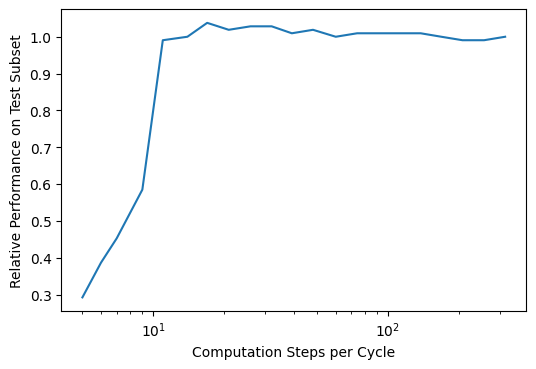

In [366]:
plt.figure(dpi=dpi)
plt.semilogx(points, res2 / res2[0])
plt.xlabel("Computation Steps per Cycle")
plt.ylabel("Relative Performance on Test Subset")

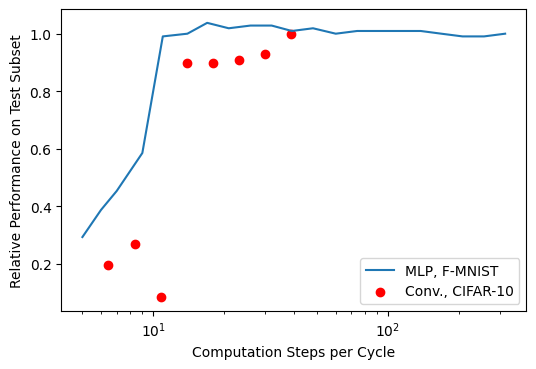

In [397]:
plt.figure(dpi=dpi)
plt.semilogx(points, res2 / res2[0], label="MLP, F-MNIST")
plt.scatter(1 / restest_points[0:8], res_preds / res_preds[0], color="red", label="Conv., CIFAR-10")
plt.xlabel("Computation Steps per Cycle")
plt.ylabel("Relative Performance on Test Subset")
plt.legend()

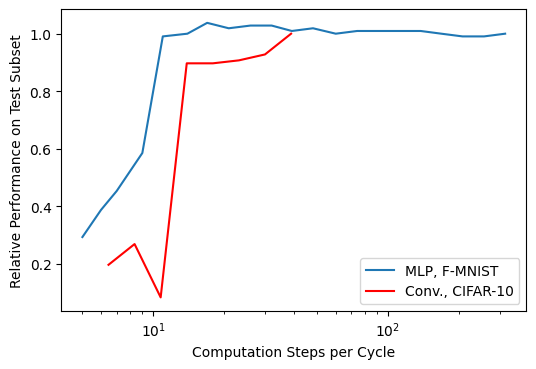

In [398]:
plt.figure(dpi=dpi)
plt.semilogx(points, res2 / res2[0], label="MLP, F-MNIST")
plt.semilogx(1 / restest_points[0:8], res_preds / res_preds[0], color="red", label="Conv., CIFAR-10")
plt.xlabel("Computation Steps per Cycle")
plt.ylabel("Relative Performance on Test Subset")
plt.legend()

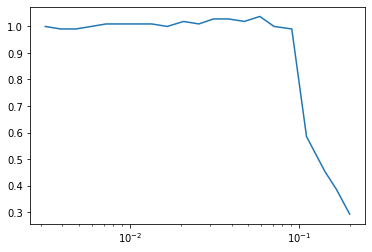

In [49]:
plt.semilogx(dts, res2 / res2[0])

In [183]:
#comparison to rate code

In [288]:
file0 = np.load("../snn_toolbox/temp/1630022613.8651817/log/gui/test/log_vars/0.npz", allow_pickle=True)

In [289]:
list(file0.keys())

['spiketrains_n_b_l_t',
 'activations_n_b_l',
 'input_b_l_t',
 'mem_n_b_l_t',
 'synaptic_operations_b_t',
 'neuron_operations_b_t',
 'top1err_b_t',
 'top5err_b_t',
 'top1err_ann',
 'top5err_ann',
 'operations_ann',
 'input_image_b_l',
 'true_classes_b',
 'avg_rate']

In [290]:
file0['mem_n_b_l_t'].shape

(2, 2)

In [291]:
inp = file0['input_b_l_t']

In [292]:
st = file0['spiketrains_n_b_l_t']

In [308]:
rc_acc = 1.0 - file0['top1err_b_t'].mean(axis=0)

In [404]:
inp.dtype

dtype('float64')

In [406]:
st.shape

(2, 2)

In [411]:
st[0,0]

'1Dense_100'

In [412]:
n_layers = st.shape[0]

In [415]:
inp.astype("bool")

array([[[[[False, False, False, ..., False, False, False]],

         [[False, False, False, ..., False, False, False]],

         [[False, False, False, ..., False, False, False]],

         ...,

         [[False, False, False, ..., False, False, False]],

         [[False, False, False, ..., False, False, False]],

         [[False, False, False, ..., False, False, False]]],


        [[[False, False, False, ..., False, False, False]],

         [[False, False, False, ..., False, False, False]],

         [[False, False, False, ..., False, False, False]],

         ...,

         [[False, False, False, ..., False, False, False]],

         [[False, False, False, ..., False, False, False]],

         [[False, False, False, ..., False, False, False]]],


        [[[False, False, False, ..., False, False, False]],

         [[False, False, False, ..., False, False, False]],

         [[False, False, False, ..., False, False, False]],

         ...,

         [[False, False, False, ...,

In [409]:
st > 0

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

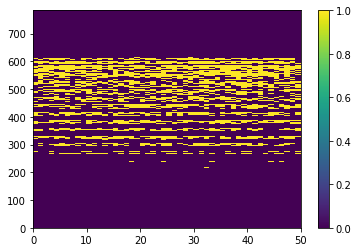

In [300]:
plt.pcolor(inp[0,:,:,0,:].reshape(28**2,50))
plt.colorbar()

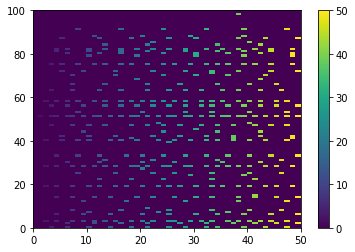

In [301]:
plt.pcolor(st[0,0][0,:,:])
plt.colorbar()

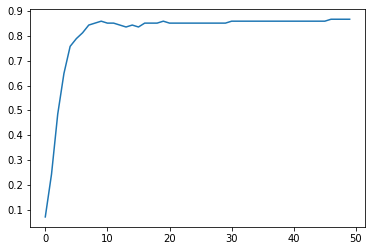

In [309]:
plt.plot(rc_acc)

In [310]:
np.sum(inp[:,:,:,:,0:1], axis=(1,2,3,4))

array([121., 396., 200., 136., 249., 196., 118., 179.,  34., 103., 235.,
        91., 113., 166., 420., 142., 211., 304., 241., 339., 423., 137.,
       173., 151., 145., 151., 345., 304., 198., 261., 361., 158.,  99.,
       254., 214., 134., 130.,  41., 164., 237., 328., 199., 271., 201.,
       374., 105., 395., 196., 170., 335., 425., 143.,  47., 497., 194.,
       389., 344., 275., 276., 120., 110., 155., 285.,  74., 218., 109.,
       133., 229., 118., 367., 113., 116., 530., 353., 332.,  95., 201.,
       430., 310., 376., 104., 382., 129., 280.,  95., 333., 242., 365.,
       305., 472.,  57.,  93., 381., 192., 173., 268., 121., 173., 458.,
       366., 143., 276.,  96., 237., 168., 213.,  72., 166., 225., 300.,
       187.,  70., 111., 329.,  75., 432., 249., 241., 115., 501., 226.,
       355., 152., 236., 300., 314., 236., 323.])

In [315]:
np.sum(inp[...,0:1], axis=(1,2,3,4))

array([121., 396., 200., 136., 249., 196., 118., 179.,  34., 103., 235.,
        91., 113., 166., 420., 142., 211., 304., 241., 339., 423., 137.,
       173., 151., 145., 151., 345., 304., 198., 261., 361., 158.,  99.,
       254., 214., 134., 130.,  41., 164., 237., 328., 199., 271., 201.,
       374., 105., 395., 196., 170., 335., 425., 143.,  47., 497., 194.,
       389., 344., 275., 276., 120., 110., 155., 285.,  74., 218., 109.,
       133., 229., 118., 367., 113., 116., 530., 353., 332.,  95., 201.,
       430., 310., 376., 104., 382., 129., 280.,  95., 333., 242., 365.,
       305., 472.,  57.,  93., 381., 192., 173., 268., 121., 173., 458.,
       366., 143., 276.,  96., 237., 168., 213.,  72., 166., 225., 300.,
       187.,  70., 111., 329.,  75., 432., 249., 241., 115., 501., 226.,
       355., 152., 236., 300., 314., 236., 323.])

In [312]:
inp.shape

(128, 28, 28, 1, 50)

In [313]:
st.shape

(2, 2)

In [314]:
st[0,0].shape

(128, 100, 50)

In [331]:
def count_spks_mlp_ratecode(input_spks, model_spikes, t):
    
    
    #count spikes over all input neurons to current step
    input_sum = np.mean(np.sum(input_spks[:,:,:,:,0:t], axis=(1,2,3,4)))
    #get the average, cumulative number of dense1 spikes at the current time
    dense_spks = model_spikes[0,0] > 0
    mid_sum = np.mean(dense_spks[...,0:t].sum(axis=(1,2)))
    
    return [input_sum, mid_sum]  
                

In [333]:
count_spks_mlp_ratecode(inp, st, 50)

[11457.5, 379.765625]

In [355]:
def count_ops_mlp_ratecode(input_spks, model_spks, t, n_hidden=100, n_classes=10):
    fanout = np.array([[n_hidden, n_classes]])
    spk_ops = count_spks_mlp_ratecode(input_spks, model_spks, t) * fanout
    
    return spk_ops.sum()

In [356]:
rc_ops = np.array([count_ops_mlp_ratecode(inp, st, t) for t in np.arange(0,50,1)])

In [357]:
rc_ops.shape

(50,)

In [358]:
rc_acc.shape

(50,)

Text(0, 0.5, 'Accuracy')

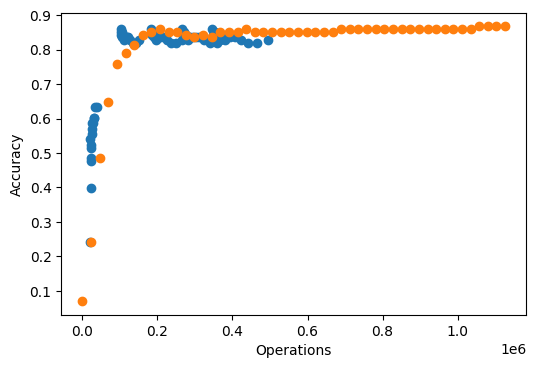

In [359]:
plt.figure(dpi=dpi)
plt.scatter(ops2[0:15,:], accs[0:15,:])
plt.scatter(rc_ops, rc_acc)
plt.xlabel("Operations")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Accuracy')

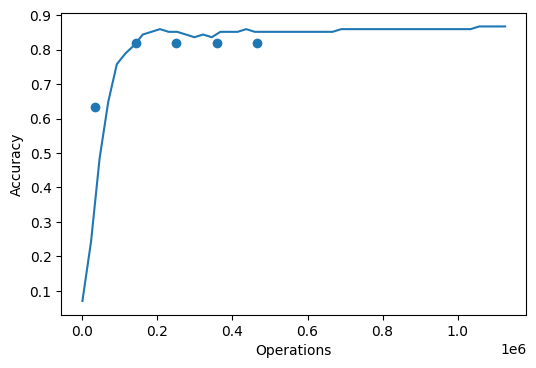

In [364]:
plt.figure(dpi=dpi)
plt.scatter(ops2[1:2,:], accs[1:2,:])
plt.plot(rc_ops, rc_acc)
plt.xlabel("Operations")
plt.ylabel("Accuracy")

In [ ]:
#  TODO - for conv2d

In [ ]:
#full dynamic execution on test set - takes a few hours

In [ ]:
all_yhs = model.evaluate(ds_test, method="dynamic")

In [ ]:
np.savez_compressed("fashion_yhs_dynamic.npz", yhs=all_yhs.numpy(), ys=y_test)

In [ ]:
yhmode = model.predict(all_yhs, "mode").ravel()

In [ ]:
yhmean = model.predict(all_yhs, "dynamic_mean")

In [ ]:
np.mean(yhmode == y_test)

In [ ]:
np.mean(yhmean == y_test)

In [ ]:
zs = model.dense1.solutions[0].y

In [ ]:
zs = model.dense1.solutions[1].y

In [ ]:
zs.shape

In [ ]:
model.evaluate(ds_test)

In [ ]:
def train_and_save(num):
    model = PhasorModel(input_shape, 
                    onehot_offset=0.0, 
                    onehot_phase=0.5,
                    projection="dot",
                   
                   exec_time=5.0,
                   repeats=5,
                   max_step=0.02)
    model.compile(optimizer="rmsprop")
    loss = model.train(ds_train, 2)
    
    yh_static = model.evaluate(ds_test, method="static")
    yh_dynamic = model.evaluate(ds_test, method="dynamic")
    
    name = "fashion_model_"+str(num)+".npz"
    np.savez_compressed(name, 
                        yh_static=yh_static.numpy(),
                        yh_dynamic=yh_dynamic.numpy(),
                        ys=y_test.numpy())

In [ ]:
train_and_save(5)

In [ ]:
for i in range(4):
    train_and_save(i)

In [ ]:
train_and_save(4)

In [ ]:
for i in range(6,8):
    train_and_save(i)